**ASSIGNMENT-5**

BHAVYA SRI DUGGINA

TASK-1 Importing the data

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
df=pd.read_csv("/content/Mall_Customers.csv");

In [104]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


TASK2-Understanding the data

In [105]:
df.shape

(200, 5)

In [106]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [107]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


TASK3-Data preprocessing

In [109]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [110]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

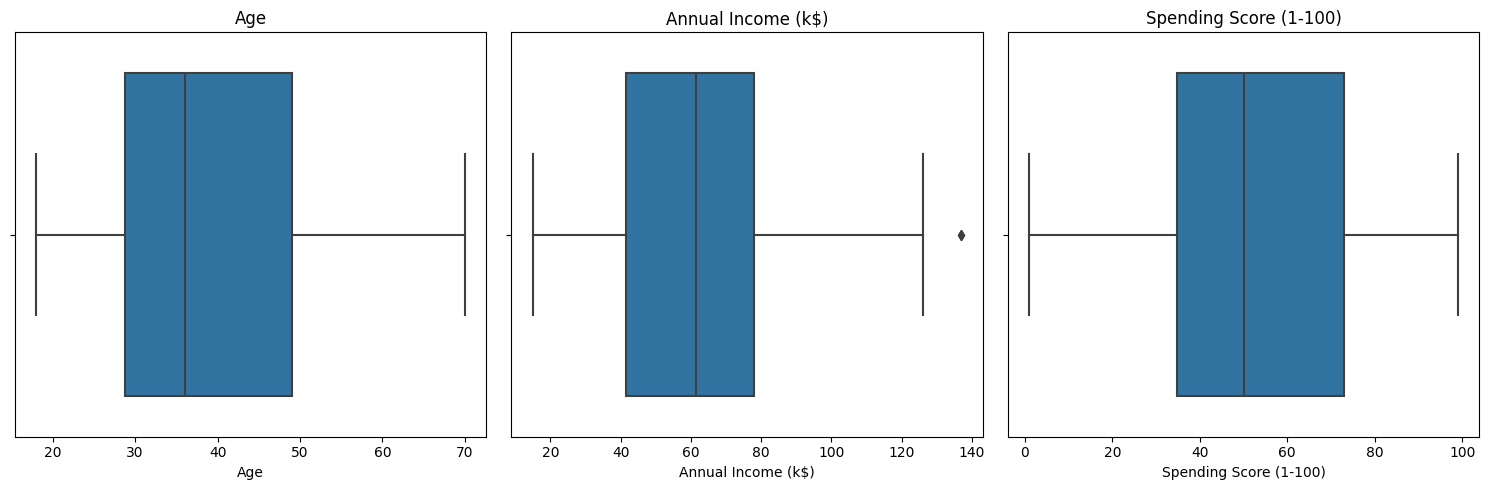

In [111]:
num=df.select_dtypes(include=['int64']).columns.to_list()
num.remove("CustomerID")
numcols=len(num)
numrows=(numcols+2)//3
fig,axs=plt.subplots(nrows=numrows,ncols=3,figsize=(15,5*numrows))
axs=axs.flatten()
for i,col in enumerate(num):
  sns.boxplot(x=df[col],ax=axs[i])
  axs[i].set_title(col)
if numcols < len(axs):
    for i in range(numcols, len(axs)):
        fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

There are no outliers as well as null values present in the data so we can proceed further

In [112]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


TASK4-Visualizations

UNIVARIATE ANALYSIS

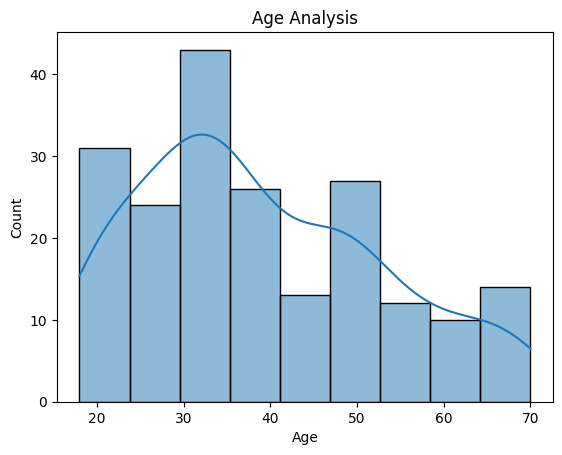

In [113]:
sns.histplot(df.Age,kde=True)
plt.title("Age Analysis")
plt.show()

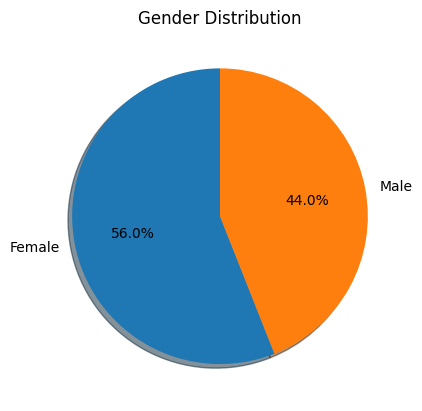

In [114]:
plt.pie(df.Gender.value_counts(),labels=df.Gender.value_counts().index,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

BIVARIATE ANALYSIS

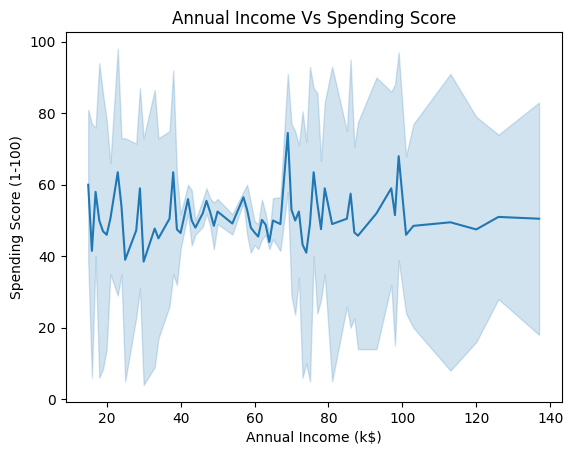

In [115]:
sns.lineplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.title("Annual Income Vs Spending Score")
plt.show()

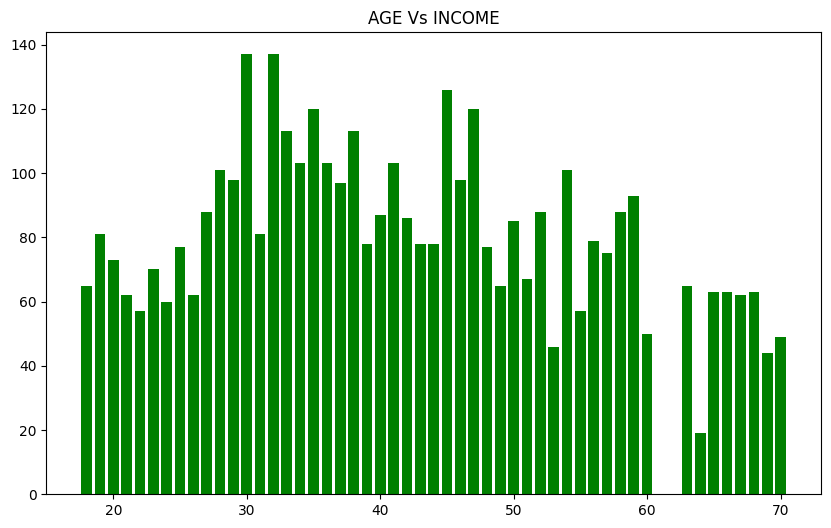

In [116]:
plt.figure(figsize=(10,6))
plt.bar(df.Age,df["Annual Income (k$)"],color='green')
plt.title("AGE Vs INCOME")
plt.show()

MULTIVARIATE

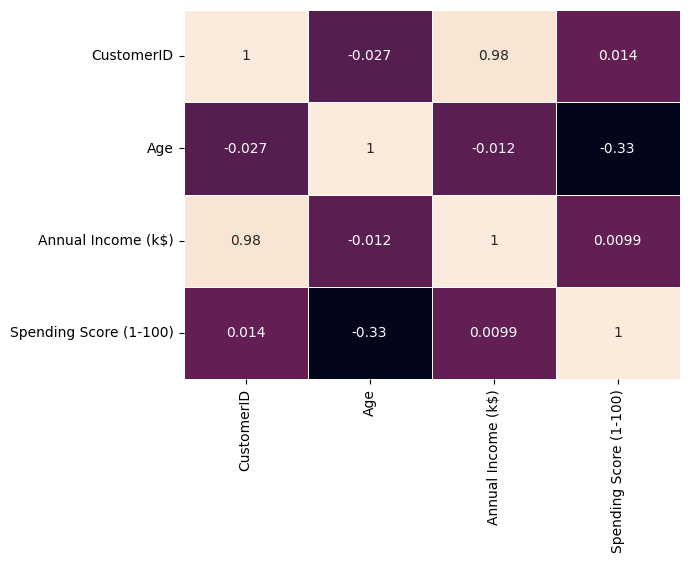

In [117]:
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.4,cbar=False)
plt.show()

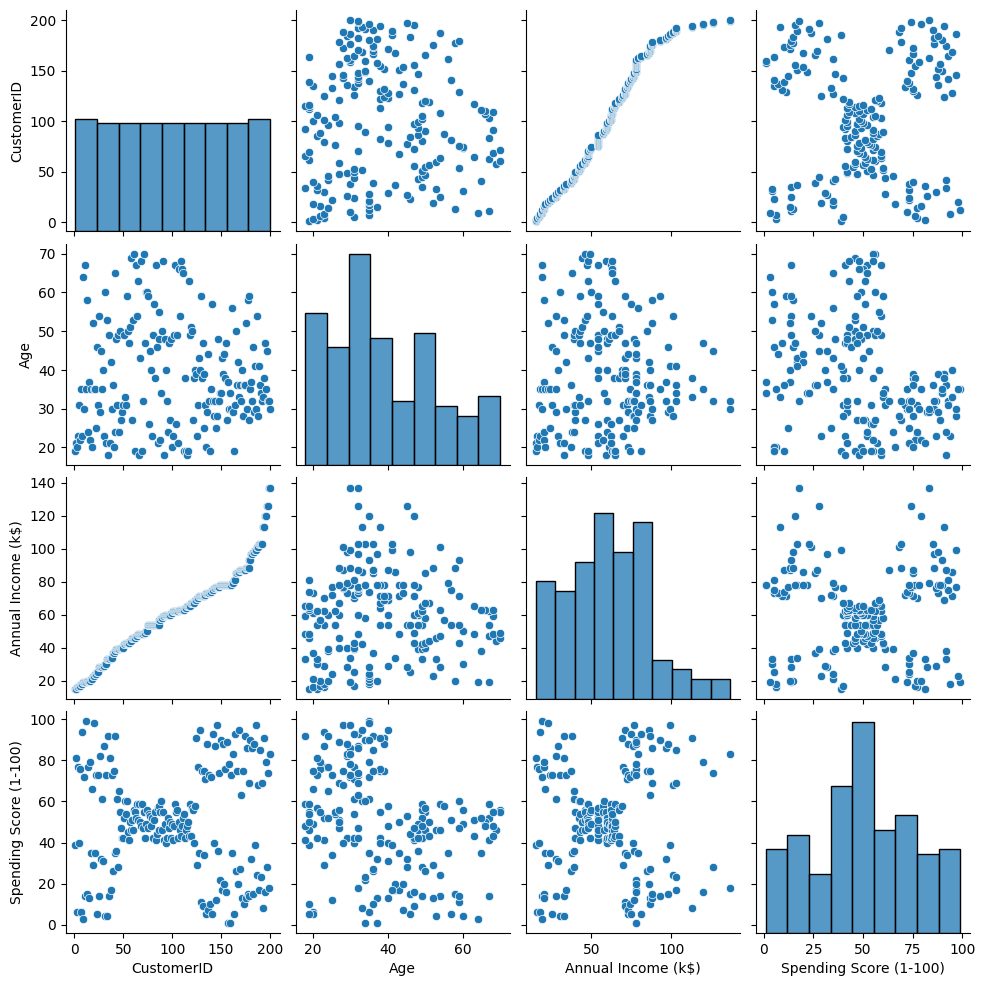

In [118]:
sns.pairplot(df)
plt.show()

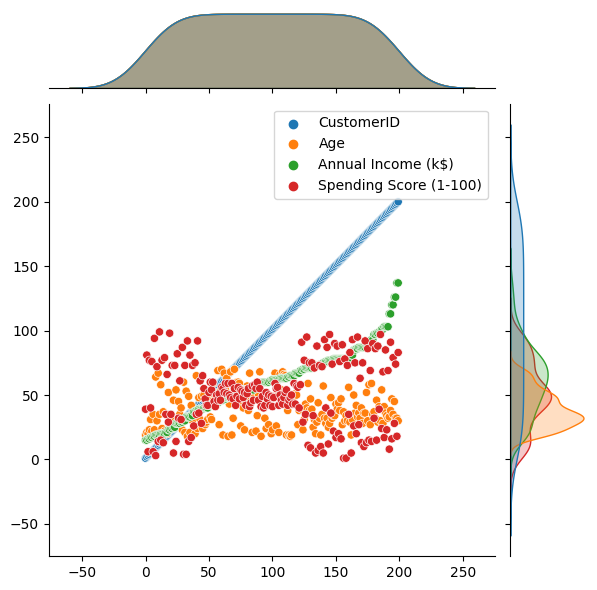

In [119]:
sns.jointplot(df)
plt.show()

TASK5-Model Building

K-Means Clustering

Firstly i am creating the kmeans model with only two types of data

Scatterplot

In [120]:
x=df.drop(columns=["Gender",'Age',"CustomerID"],axis=1)

In [121]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


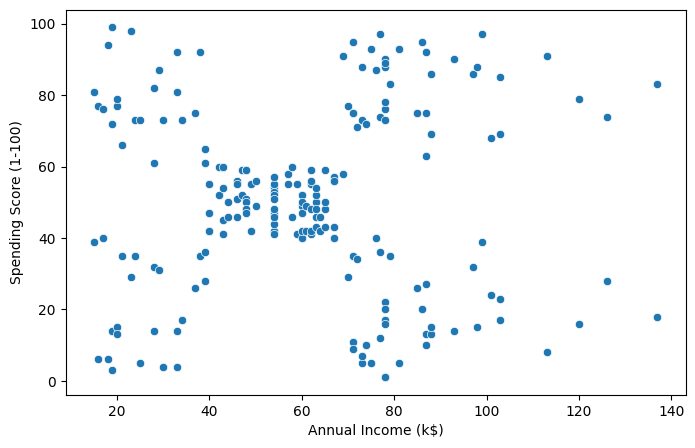

In [122]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=x["Annual Income (k$)"],y=x["Spending Score (1-100)"])
plt.show()

In [123]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init="k-means++",random_state=42)
  km.fit(x)
  wcss.append(km.inertia_)

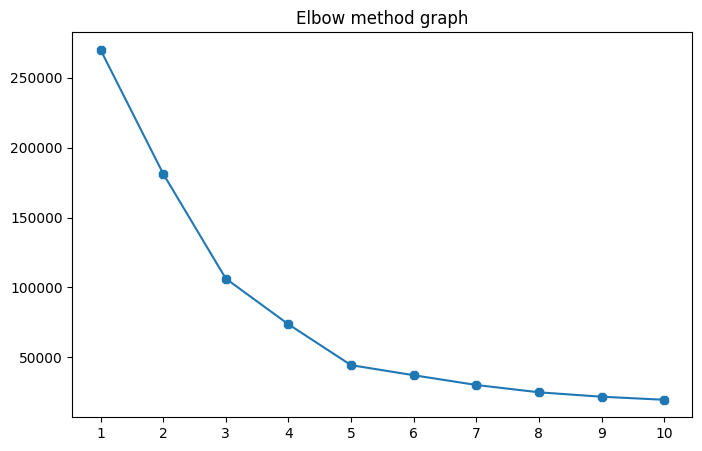

In [124]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='8')
plt.title("Elbow method graph")
plt.xticks(np.arange(1,11,1))
plt.show()


So from the graph after 5 the graph decreases so we take k=5

In [125]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)
df["clusters"]=y_predict

In [126]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


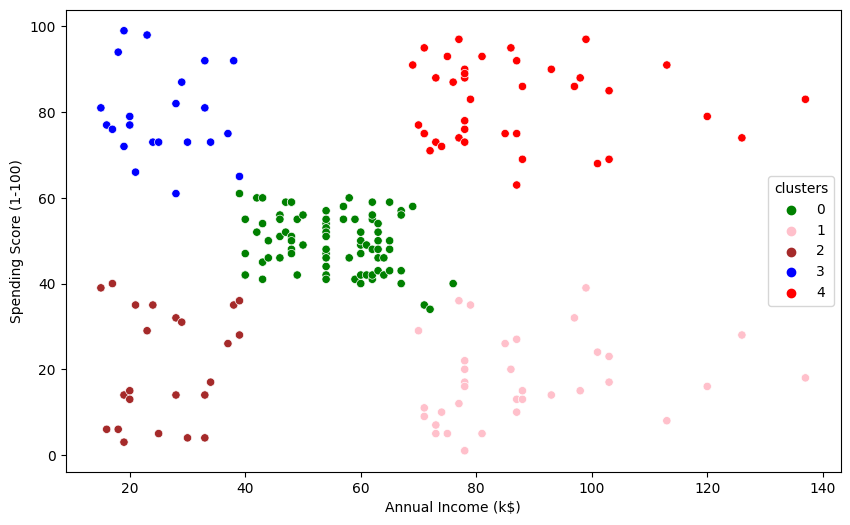

In [127]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="clusters",
                 palette=['green','pink','brown','blue','red'], legend='full',data = df )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Kmeans by taking 3 data labels as input

In [128]:
y=df.drop(columns=["Gender","CustomerID"],axis=1)

In [129]:
y.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2


In [130]:
wcss2=[]
for i in range(1,11):
  km2=KMeans(n_clusters=i,init="k-means++",random_state=42)
  km2.fit(y)
  wcss2.append(km2.inertia_)

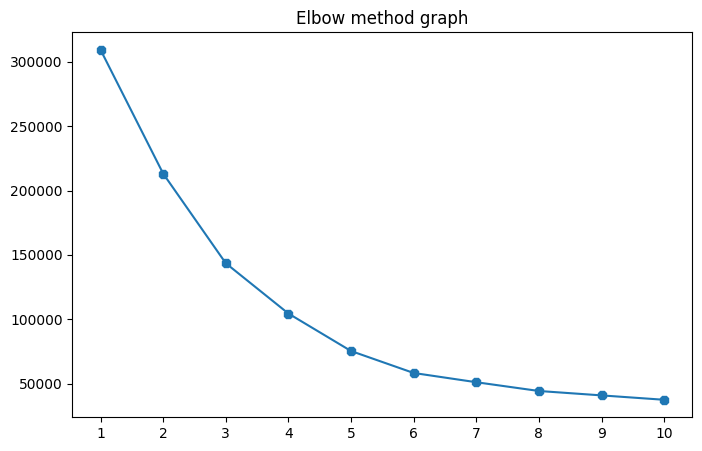

In [131]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss2,marker='8')
plt.title("Elbow method graph")
plt.xticks(np.arange(1,11,1))
plt.show()


From graph we take k=5

In [132]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict2= kmeans.fit_predict(y)
df["clusters2"]=y_predict2

Mapping Cluster to Data

In [133]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,clusters2
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,2,3


clusters column kmeans modelling is taken for only 2 data columns Annual Income and Spending Score

CustomerIDS according to the clusters

In [134]:
cluster1=df[df.clusters==0]
print(len(cluster1))
print(cluster1["CustomerID"].values)

81
[ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]


In [135]:
cluster2=df[df.clusters==1]
print(len(cluster2))
print(cluster2["CustomerID"].values)

35
[125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


In [136]:
cluster3=df[df.clusters==2]
print(len(cluster3))
print(cluster3["CustomerID"].values)

23
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


In [137]:
cluster4=df[df.clusters==3]
print(len(cluster4))
print(cluster4["CustomerID"].values)

22
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


In [138]:
cluster5=df[df.clusters==4]
print(len(cluster5))
print(cluster5["CustomerID"].values)

39
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]



clusters2 column kmeans modelling is taken for only 3 data columns Annual Income ,Age and Spending Score


CustomerIDS according to the clusters

In [139]:
clusters1=df[df.clusters2==0]
print(len(clusters1))
print(clusters1["CustomerID"].values)

23
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]


In [140]:
clusters2=df[df.clusters2==1]
print(len(clusters2))
print(clusters2["CustomerID"].values)

79
[ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 127 143]


In [141]:
clusters3=df[df.clusters2==2]
print(len(clusters3))
print(clusters3["CustomerID"].values)

39
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


In [142]:
clusters4=df[df.clusters2==3]
print(len(clusters4))
print(clusters4["CustomerID"].values)

23
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


In [143]:
clusters5=df[df.clusters2==4]
print(len(clusters5))
print(clusters5["CustomerID"].values)

36
[125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
